In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

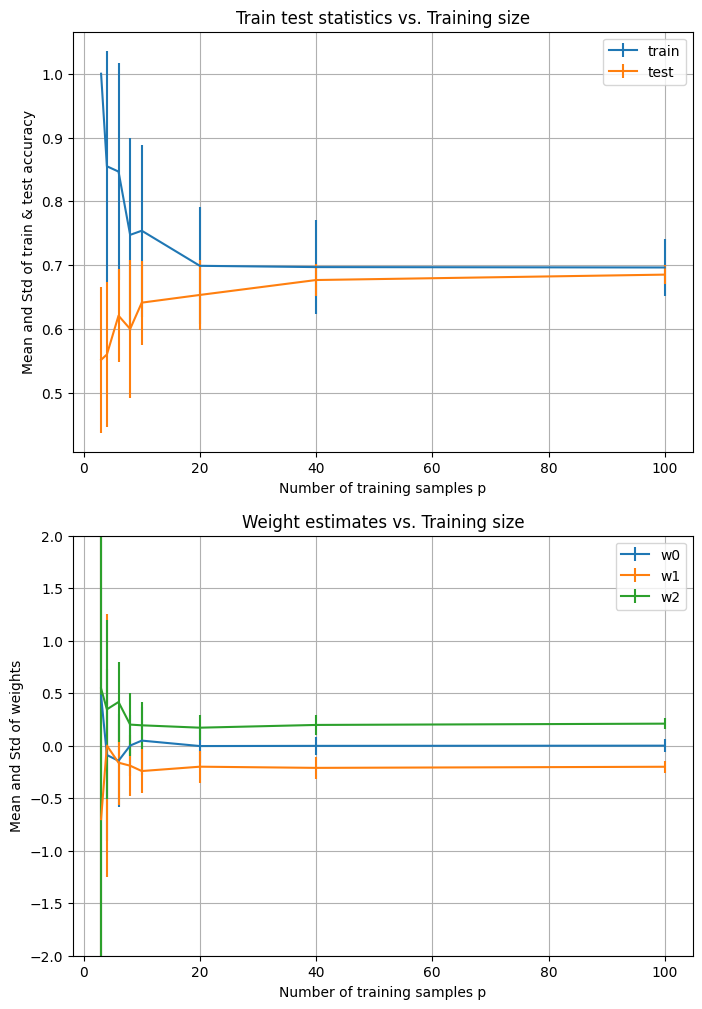

In [66]:
# H8.2: Variability of classification

p_list = [3, 4, 6, 8, 10, 20, 40, 100]

mu1 = np.array([0, 1])
mu2 = np.array([1, 0])
cov = 2*np.eye(2)

train_accs = [[] for _ in range(len(p_list))]
test_accs = [[] for _ in range(len(p_list))]
weights = [[] for _ in range(len(p_list))]

for i, p in enumerate(p_list):
  for rep in range(50):
    # n1 + n2 = p
    n1 = p // 2
    n2 = p - n1

    x1 = np.random.multivariate_normal(mu1, cov, size=n1)
    y1 = np.ones(n1)
    x2 = np.random.multivariate_normal(mu2, cov, size=n2)
    y2 = -np.ones(n2)

    x = np.vstack([x1, x2]) # shape: (100, 2)
    y = np.concatenate([y1, y2]) # shape: (100,)

    # shuffle
    index = np.random.permutation(len(x))
    x = x[index]
    y = y[index]

    # add bias to X and compute weight
    X = np.hstack([np.ones((x.shape[0], 1)), x])
    w = np.linalg.pinv(X.T @ X) @ X.T @ y
    weights[i].append(w)

    # generate test sets
    x1_test = np.random.multivariate_normal(mu1, cov, size=500)
    x2_test = np.random.multivariate_normal(mu2, cov, size=500)
    x_test = np.vstack([x1_test, x2_test]) # shape: (1000, 2)
    y_test = np.concatenate([np.ones(500), -np.ones(500)])
    X_test = np.hstack([np.ones((1000, 1)), x_test])

    # prediction and accuracies
    y_pred_train = np.sign(X @ w)
    y_pred_test = np.sign(X_test @ w)

    r_train = np.mean(y_pred_train == y)
    r_test = np.mean(y_pred_test == y_test)

    train_accs[i].append(r_train) # shape: (8, 50)
    test_accs[i].append(r_test) # shape: (8, 50)

# convert weights to np.array
weights_np = [np.array(weight) for weight in weights] # shape: (8, 50, 3)

# mean and std of each weight components
w0_mean = []
w0_std = []
w1_mean = []
w1_std = []
w2_mean = []
w2_std = []

for w in weights:
  w_array = np.array(w) # shape: (50, 3)

  w0_mean.append(np.mean(w_array[:, 0]))
  w0_std.append(np.std(w_array[:, 0]))

  w1_mean.append(np.mean(w_array[:, 1]))
  w1_std.append(np.std(w_array[:, 1]))

  w2_mean.append(np.mean(w_array[:, 2]))
  w2_std.append(np.std(w_array[:, 2]))

# mean and std of r_train and r_test
train_mean = [np.mean(acc) for acc in train_accs]
train_std = [np.std(acc) for acc in train_accs]
test_mean = [np.mean(acc) for acc in test_accs]
test_std = [np.std(acc) for acc in test_accs]

# plot errorbars for (a) and (b)
fig, ax = plt.subplots(2, 1, figsize=(8, 12))

ax[0].errorbar(p_list, train_mean, yerr=train_std, label='train')
ax[0].errorbar(p_list, test_mean, yerr=test_std, label='test')
ax[0].set_title("Train test statistics vs. Training size")
ax[0].set_xlabel("Number of training samples p")
ax[0].set_ylabel("Mean and Std of train & test accuracy")
ax[0].legend()
ax[0].grid(True)

ax[1].errorbar(p_list, w0_mean, yerr=w0_std, label='w0')
ax[1].errorbar(p_list, w1_mean, yerr=w1_std, label='w1')
ax[1].errorbar(p_list, w2_mean, yerr=w2_std, label='w2')
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel("Number of training samples p")
ax[1].set_ylabel("Mean and Std of weights")
ax[1].set_title("Weight estimates vs. Training size")
ax[1].legend()
ax[1].grid(True)

plt.show()